<a href="https://colab.research.google.com/github/YasminGarcia1210/MAESTRIA_DATOS/blob/main/TAREA_2_FUNDAMENTOS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fundamnentos de Análitica 2

Yasmin Johanna Garcia

Javier Ricardo Muñoz

## **1. Carga de paquetes**

In [ ]:
import numpy as np
import pandas as pd # Operaciones con dataframes
from matplotlib import pyplot as plt # gráficos
from statsmodels.tsa.seasonal import seasonal_decompose # descomposición de series
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # Holwinters simple
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holwinters doble y tripe
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz


## **2. Carga de datos**

In [ ]:
data = pd.read_excel("datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


## **Taller 2**

In [ ]:
data


,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911
...,...,...,...,...
2018-12-01,10.725865,10835.398,1301.822,6142.856
2019-01-01,13.739328,10314.438,1642.851,6343.066
2019-02-01,12.427409,10557.917,1498.272,6264.403


**Preparación de los datos**

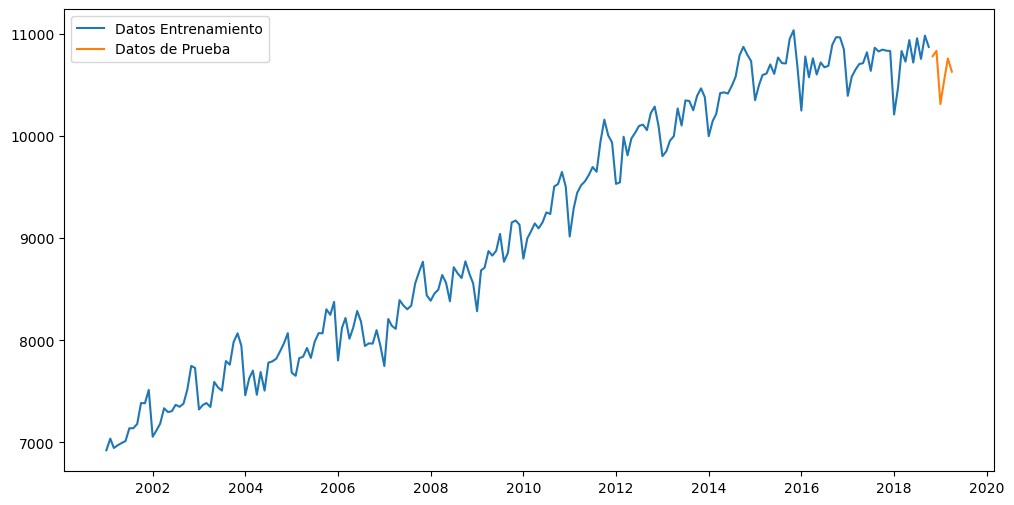

In [ ]:
train_len = 214
data_train = data[["Ocupados"]][:train_len]
data_test = data[["Ocupados"]][train_len:]


fig = plt.figure(figsize=(12, 6))
plt.plot(data_train,label="Datos Entrenamiento")
plt.plot(data_test,label="Datos de Prueba")
plt.legend()
plt.show()

**Dumificar**

In [ ]:
month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index)
train_dummy=month_dummies[:train_len]
test_dummy=month_dummies[train_len:]

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2018-11-01,0,0,0,0,0,0,0,0,0,1,0
2018-12-01,0,0,0,0,0,0,0,0,0,0,1
2019-01-01,0,0,0,0,0,0,0,0,0,0,0
2019-02-01,1,0,0,0,0,0,0,0,0,0,0
2019-03-01,0,1,0,0,0,0,0,0,0,0,0
2019-04-01,0,0,1,0,0,0,0,0,0,0,0


### **Modelos**

**Tendencia Lineal**

In [ ]:
y = data_train["Ocupados"]
X = sm.add_constant(train_dummy)
lin = sm.OLS(y,X)
lin_t = lin.fit()
print(lin_t.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.3250
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.980
Time:                        16:23:15   Log-Likelihood:                -1833.0
No. Observations:                 214   AIC:                             3690.
Df Residuals:                     202   BIC:                             3730.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8724.5387    308.067     28.320      0.0

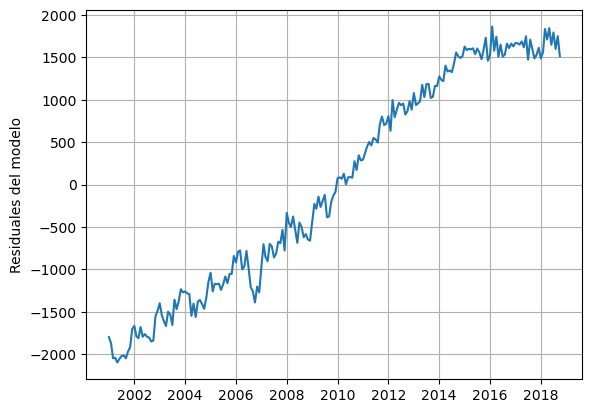

In [ ]:
plt.ylabel("Residuales del modelo")
plt.plot(lin_t.resid)
plt.grid()

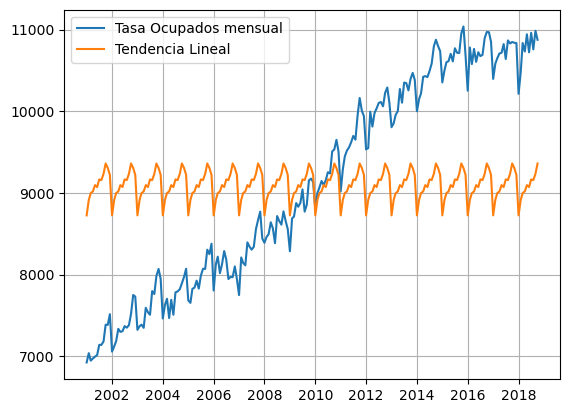

In [ ]:
plt.plot(y,label="Tasa Ocupados mensual")
plt.plot(lin_t.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Ajustar el modelo a los datos de entrenamiento
y_train = data_train["Ocupados"]
X_train = sm.add_constant(train_dummy)
model = sm.OLS(y_train, X_train)
result = model.fit()

# Realizar predicciones en los datos de prueba
y_test = data_test["Ocupados"]
X_test = sm.add_constant(test_dummy)
y_pred = result.predict(X_test)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1619.6142268040358


In [ ]:
range_dates = pd.date_range(data_train.index[-1]+ relativedelta(months=1), periods=6,freq='MS')
X_for= sm.add_constant(test_dummy)

print(X_for)

            const  2  3  4  5  6  7  8  9  10  11  12
mes                                                  
2018-11-01    1.0  0  0  0  0  0  0  0  0   0   1   0
2018-12-01    1.0  0  0  0  0  0  0  0  0   0   0   1
2019-01-01    1.0  0  0  0  0  0  0  0  0   0   0   0
2019-02-01    1.0  1  0  0  0  0  0  0  0   0   0   0
2019-03-01    1.0  0  1  0  0  0  0  0  0   0   0   0
2019-04-01    1.0  0  0  1  0  0  0  0  0   0   0   0


In [ ]:
dt = season.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)

print(preds)

            Point_forecast     lower_95      upper_95
2018-11-01     9386.702222  6722.140249  12051.264196
2018-12-01     9310.332667  6645.770693  11974.894640
2019-01-01     8808.217632  6147.348746  11469.086517
2019-02-01     9001.037684  6340.168799  11661.906569
2019-03-01     9090.037158  6429.168273  11750.906043
2019-04-01     9102.647316  6441.778431  11763.516201


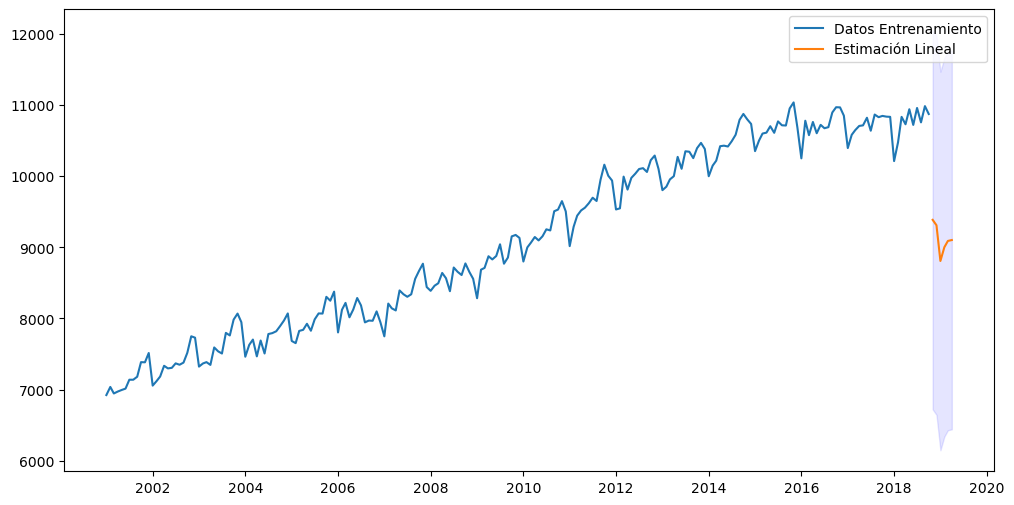

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Lineal")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
# Tomar y_test del conjunto de prueba
y_test = data_test["Ocupados"]
# Convertir índices de y_test a números para que coincidan con y_prd
y_test.index = range(len(y_test))

r2_lineal = r2_score(y_test, y_prd)
rmse_lineal = np.sqrt(mean_squared_error(y_test, y_prd))
print(f"Coef R**2 : {r2_lineal}")
print(f"RMSE : {rmse_lineal}")

Coef R**2 : -74.8950403860965
RMSE : 1532.9303848386514


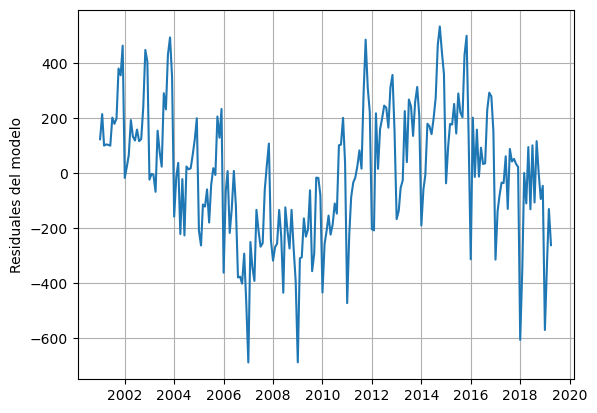

**Tendencia + Estacionalidad**

In [ ]:
y = data_train["Ocupados"]
x = np.linspace(1,data_train.shape[0],data_train.shape[0])
data_train["x"] = x
data_train["x2"] = x**2
data_train["x3"] = x**3
data_train["x4"] = x**4
data_train["x5"] = x**5
X = sm.add_constant(pd.concat([data_train[["x","x2","x3","x4","x5"]],train_dummy],axis=1))
pol = sm.OLS(y,X)
pol_5 = pol.fit()
print(pol_5.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1447.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          1.19e-194
Time:                        16:39:37   Log-Likelihood:                -1324.0
No. Observations:                 214   AIC:                             2682.
Df Residuals:                     197   BIC:                             2739.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6588.6414     58.135    113.334      0.0

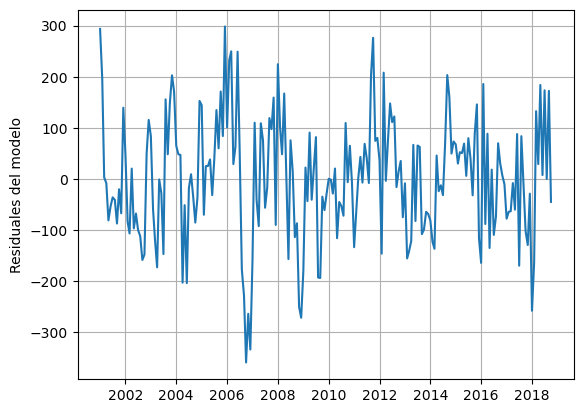

In [ ]:
plt.ylabel("Residuales del modelo")
plt.plot(pol_5.resid)
plt.grid()

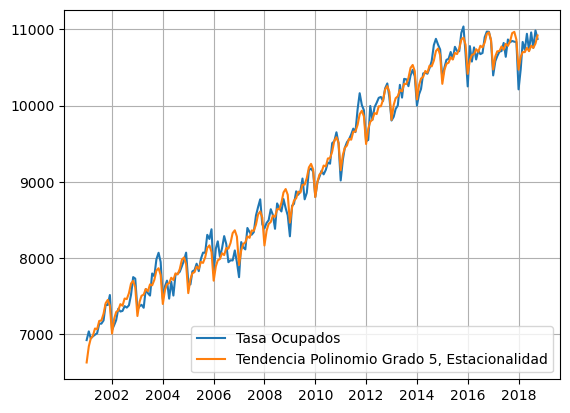

In [ ]:
plt.plot(y,label="Tasa Ocupados")
plt.plot(pol_5.fittedvalues,label="Tendencia Polinomio Grado 5, Estacionalidad")
plt.legend()
plt.grid()
plt.show()

In [ ]:
h=6
x_for= np.linspace((data_train.shape[0]+1),(data_train.shape[0]+h),h) # generando x's para predecir
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2,x_for**3, x_for**4,x_for**5),axis=1),columns=["x","x2","x3","x4","x5"] ) # Dataframe de los x

test_dummy_ = test_dummy
test_dummy_ = test_dummy_.reset_index(drop=True)
test_dummy_
X_for= sm.add_constant(pd.concat([x_for_all,test_dummy_],axis=1))
X_for

,const,x,x2,x3,x4,x5,2,3,4,5,6,7,8,9,10,11,12
0,1.0,215.0,46225.0,9938375.0,2.136751e+09,4.594014e+11,0,0,0,0,0,0,0,0,0,1,0
1,1.0,216.0,46656.0,10077696.0,2.176782e+09,4.701850e+11,0,0,0,0,0,0,0,0,0,0,1
2,1.0,217.0,47089.0,10218313.0,2.217374e+09,4.811701e+11,0,0,0,0,0,0,0,0,0,0,0
3,1.0,218.0,47524.0,10360232.0,2.258531e+09,4.923597e+11,1,0,0,0,0,0,0,0,0,0,0
4,1.0,219.0,47961.0,10503459.0,2.300258e+09,5.037564e+11,0,1,0,0,0,0,0,0,0,0,0
5,1.0,220.0,48400.0,10648000.0,2.342560e+09,5.153632e+11,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
dt = pol_5.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2019-05-01    10934.198252  10664.272414  11204.124090
2019-06-01    10829.067438  10555.714341  11102.420535
2019-07-01    10435.200323  10157.781608  10712.619037
2019-08-01    10603.226909  10321.375191  10885.078626
2019-09-01    10664.267935  10377.406896  10951.128975
2019-10-01    10663.468116  10370.976494  10955.959738


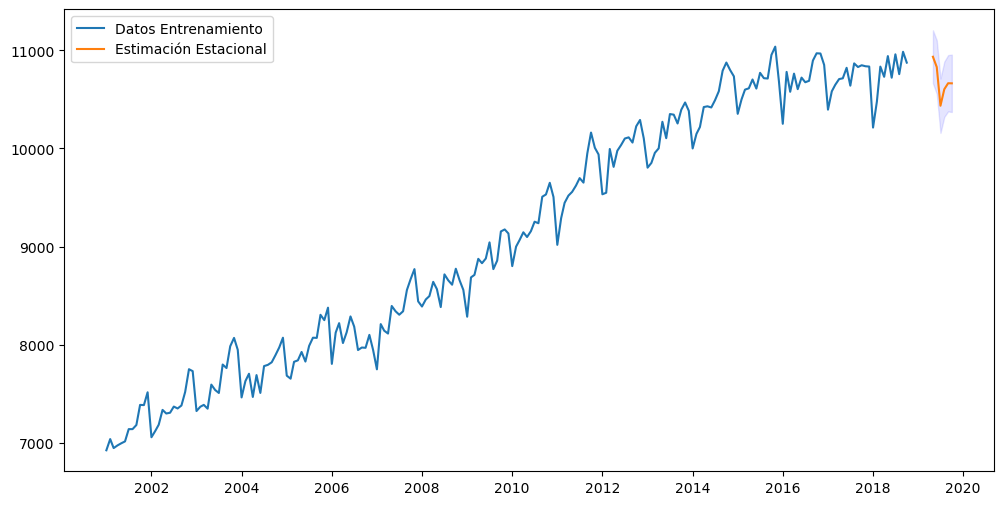

In [ ]:

#Grafico de predicciones con modelo tendencia grado 5 + estacionalidad
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [ ]:

y_test = data_test["Ocupados"]
y_test.index = range(len(y_test))

r2_g5 = r2_score(y_test, y_prd)
rmse_g5  = np.sqrt(mean_squared_error(y_test, y_prd))
print(f"Coef R5 : {r2_g5}")
print(f"RMSE : {rmse_g5}")

Coef R5 : 0.7322029581466069
RMSE : 91.05810795858785


## **Supuestos**

In [ ]:
signo = pol_5.resid>0

In [ ]:
runstest_1samp(signo, correction=False)

(-3.8361549673925706, 0.00012497556616534246)

El segundo valor corresponde al p-valor=0.00012, por lo tanto considerando un $α$=0.05, los resultados obtenidos no permiten rechazar la hipótesis nula, es decir, la serie y1 parece no comportarse como un ruido blanco, **Se presenta autocorrelación**.

In [ ]:
sm.stats.acorr_ljungbox(pol_5.resid, lags=[1], return_df=True,boxpierce=True ) # Se puede hacer para un solo lag.

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,35.442594,2.626793e-09,34.950336,3.382231e-09


Con el resultado anterior rechazamos la hipótesis nula de no autocorrelación para el primer rezago, lo ideal antes de tomar la decisión Es probar por lo menos los primeros 20 rezagos.

In [ ]:
Resul_lb_bp = sm.stats.acorr_ljungbox(data.Ocupados, lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

,lb_stat,lb_pvalue,bp_stat,bp_pvalue,lb_ho,bp_ho
1,213.848488,1.987331e-48,210.958644,8.486316e-48,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
2,421.882574,2.451111e-92,415.244368,6.773783e-91,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
3,625.378784,3.172685e-135,614.157330,8.594402e-133,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
4,825.355742,2.471383e-177,808.729505,9.873368e-174,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
5,1021.698974,1.204937e-218,998.881735,1.049496e-213,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
6,1213.666388,5.275121e-259,1183.931404,1.437450e-252,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
7,1402.321425,1.214195e-298,1364.938264,1.488143e-290,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
8,1586.436188,0.000000e+00,1540.759569,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
9,1767.316037,0.000000e+00,1712.676902,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
10,1945.503650,0.000000e+00,1881.232753,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr


El resultado del test de Ljung-Box muestra que se rechaza la hipótesis nula de no autocorrelación para todos los lags considerados (1 al 20). Esto se evidencia por los valores bajos de p (p-value) en las columnas lb_pvalue y bp_pvalue.

En el caso del test de Ljung-Box (lb_stat), los estadísticos son significativamente altos, y en el caso del test de Box-Pierce (bp_stat), también son altos, lo que indica la presencia de autocorrelación en los residuos.

En términos simples, esto sugiere que hay evidencia de autocorrelación en los residuos del modelo, lo cual es una violación de la suposición de independencia de los residuos en el análisis de regresión.

## **Homoscedasticidad y Heteroscedasticidad**

In [ ]:
sm.stats.acorr_ljungbox((data.Ocupados-data.Ocupados.mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,183.983988,6.540417e-42,181.497718,2.282523e-41
2,349.643863,1.190693e-76,344.172730,1.835867e-75
3,500.892842,3.056176e-108,492.015200,2.564874e-106
4,642.578833,9.419447e-138,629.871841,5.304772e-135
5,778.288564,5.754246e-166,761.302436,2.717324e-162
6,904.994860,3.125971e-192,883.442739,1.425870e-187
7,1028.510888,8.321118e-218,1001.951361,4.562051e-212
8,1143.427839,1.597591e-241,1111.691872,1.143498e-234
9,1257.321649,5.096909e-265,1219.942296,6.002466e-257
10,1372.708674,7.737770e-289,1329.092184,2.012827e-279


Si el valor p obtenido de una prueba de homocedasticidad es menor que el nivel de significancia (generalmente establecido en 0.05), entonces se rechaza la hipótesis nula de homocedasticidad y se concluye que los errores no son homocedásticos, lo que implica la presencia de heteroscedasticidad.

## **Normalidad**

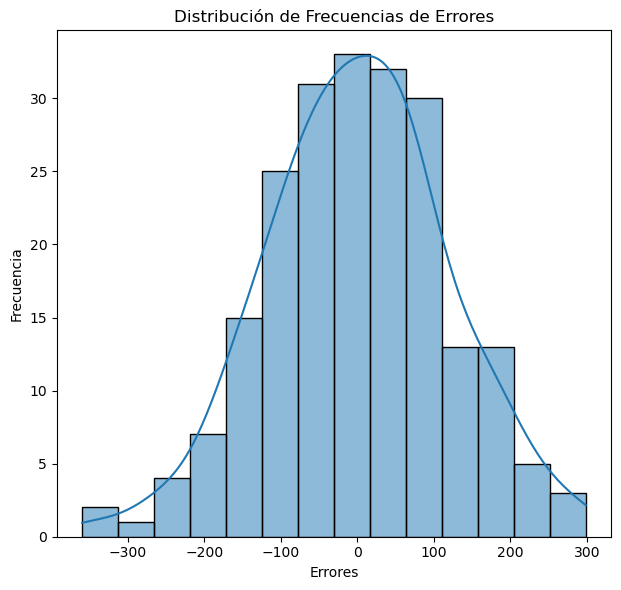

In [ ]:
import seaborn as sns
# Distribución de Frecuencias
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(pol_5.resid, kde=True)
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.title('Distribución de Frecuencias de Errores')

plt.tight_layout()
plt.show()

In [ ]:
stats.shapiro(pol_5.resid)


ShapiroResult(statistic=0.9966813921928406, pvalue=0.9314735531806946)

In [ ]:
stats.jarque_bera(pol_5.resid)


SignificanceResult(statistic=0.33958823112050307, pvalue=0.8438385319365133)

Para ambas pruebas, no se puede rechazar la hipótesis de que los datos provienen de una distribución normal. Así, parece ser que la serie y1 proviene de un proceso ruido blanco gaussiano.

### Conclusión

Se ha realizado un análisis exhaustivo de regresión polinómica de quinto grado. El modelo ajustado muestra un buen ajuste, con un alto R-cuadrado ajustado. Sin embargo, al analizar los residuos, se encontró evidencia de autocorrelación hasta el lag 20 y heteroscedasticidad.

Las predicciones del modelo en el conjunto de prueba indican un rendimiento razonable, con un R-cuadrado de aproximadamente 0.732 y un RMSE de alrededor de 91.06.